# TASK-2 (LINEAR REGRESSION)

# IMPORTING ALL LIBRARIES

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# READING DATA

In [72]:
url = "http://bit.ly/w-data"
data1 = pd.read_csv(url)

print("downloaded data")
data1.head(7)

downloaded data


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88


In [73]:
data1.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [74]:
x=data1.iloc[:,:-1].values
y=data1.iloc[:,-1].values

In [75]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [76]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

# VISUALISING THE DATA AND SPLITTING THE DATA AS TRAIN AND TEST SET 

Text(0, 0.5, 'PERCENTAGE SCORES')

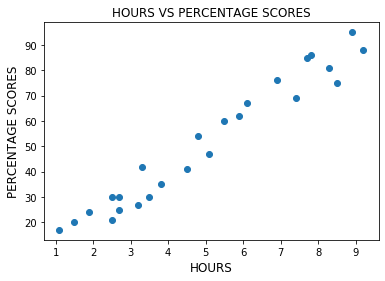

In [77]:
plt.scatter(x,y)
plt.title("HOURS VS PERCENTAGE SCORES")
plt.xlabel("HOURS",fontsize=12)
plt.ylabel("PERCENTAGE SCORES",fontsize=12)

# TRAIN_TEST_SPLIT

In [78]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

# IMPORTING LINEAR REGRESSION AND FIT THE MODEL

In [79]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((18, 1), (7, 1), (18,), (7,))

In [81]:
x_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9],
       [3.8],
       [1.9]])

In [82]:
y_test

array([20, 27, 69, 30, 62, 35, 24], dtype=int64)

In [83]:
reg.coef_

array([9.94167834])

In [84]:
reg.intercept_

1.9322042531516601

# PLOTTING LINEAR REGRESSION MODEL

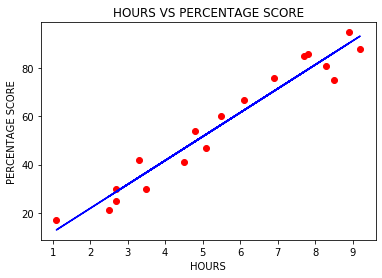

In [85]:
#TRAINING SET
plt.scatter(x_train,y_train,color="red")
plt.plot(x_train,reg.predict(x_train),color="blue")
plt.title("HOURS VS PERCENTAGE SCORE")
plt.xlabel("HOURS")
plt.ylabel("PERCENTAGE SCORE")
plt.show()

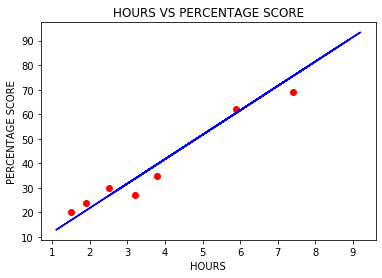

In [86]:
#TESTING SET
plt.scatter(x_test,y_test,color="red")
plt.plot(x_train,reg.predict(x_train),color="blue")
plt.title("HOURS VS PERCENTAGE SCORE")
plt.xlabel("HOURS")
plt.ylabel("PERCENTAGE SCORE")
plt.show()

# PREDICTION Y FOR X TEST

In [87]:
y_pred = reg.predict(x_test)
y_pred

array([16.84472176, 33.74557494, 75.50062397, 26.7864001 , 60.58810646,
       39.71058194, 20.8213931 ])

# COMPARING ACTUAL DATA VS PREDICTED DATA

In [88]:
com = pd.DataFrame({"ACTUAL" : y_test, "PREDICTED": y_pred})
com

,ACTUAL,PREDICTED
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


# TESTING THE SCORE OF THE STUDENT WHO STUDIED FOR  9.25 HRS

In [89]:
hrs = np.array([9.25])
hrs = hrs.reshape(1,-1)

In [90]:
our_pred = reg.predict(hrs)
print("NO OF HOURS STUDIED = {}".format(hrs))
print("PREDICTED SCORE = {}".format(our_pred[0]))


NO OF HOURS STUDIED = [[9.25]]
PREDICTED SCORE = 93.89272889341652


# EVALUATE THE MODEL

In [91]:
from sklearn import metrics
print("MEAN ABSOLUTE ERROR:",metrics.mean_absolute_error(y_test,y_pred))

MEAN ABSOLUTE ERROR: 4.130879918502482


In [92]:
print("MEAN SQUARED ERROR:",metrics.mean_squared_error(y_test,y_pred))

MEAN SQUARED ERROR: 20.33292367497996


In [93]:
print("ROOT MEAN SQUARED ERROR:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

ROOT MEAN SQUARED ERROR: 4.509204328368805
